# Analyzing Movie Ratings

In [18]:
# libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [11]:
# Data is already cleaned.
df = pd.read_csv("../Data/Best Movies Netflix.csv")

## Correlation Analysis:

In [48]:
# Correlation coefficients between the numeric columns.
correlation_matrix = df[['RELEASE_YEAR', 'SCORE', 'NUMBER_OF_VOTES']].corr()
print(correlation_matrix)

                 RELEASE_YEAR     SCORE  NUMBER_OF_VOTES
RELEASE_YEAR         1.000000 -0.149726        -0.212883
SCORE               -0.149726  1.000000         0.343683
NUMBER_OF_VOTES     -0.212883  0.343683         1.000000


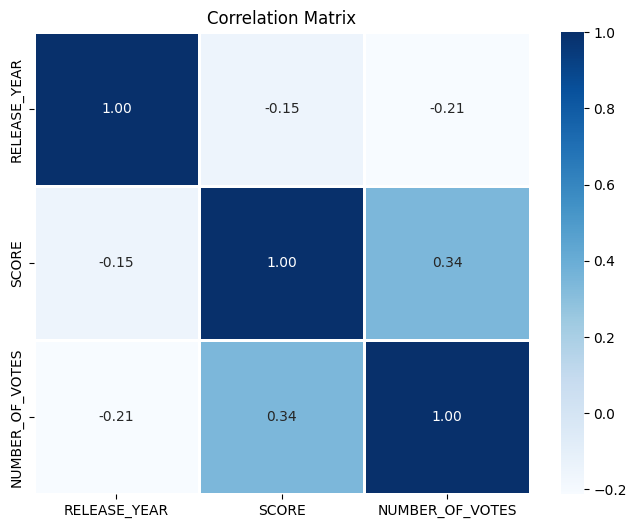

In [51]:
# `figure(figsize=(8, 6))` sets the dimensions of the plot's canvas or figure. 
# The first value (8) represents the width of the figure in inches, and the second value (6) represents the height in inches.
# `annot`: Set to True to display cell values at the center of each cell.
# `cmap`: Determines the color scheme or theme of the plot.
# `fmt`: Controls the number of decimal places displayed in the cell values. For example, `.3f` displays as 0.000, and `.5f` as 0.00000.
# `linewidths`: Adjusts the width of lines that separate each cell.
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=1)
plt.title('Correlation Matrix')
plt.show()

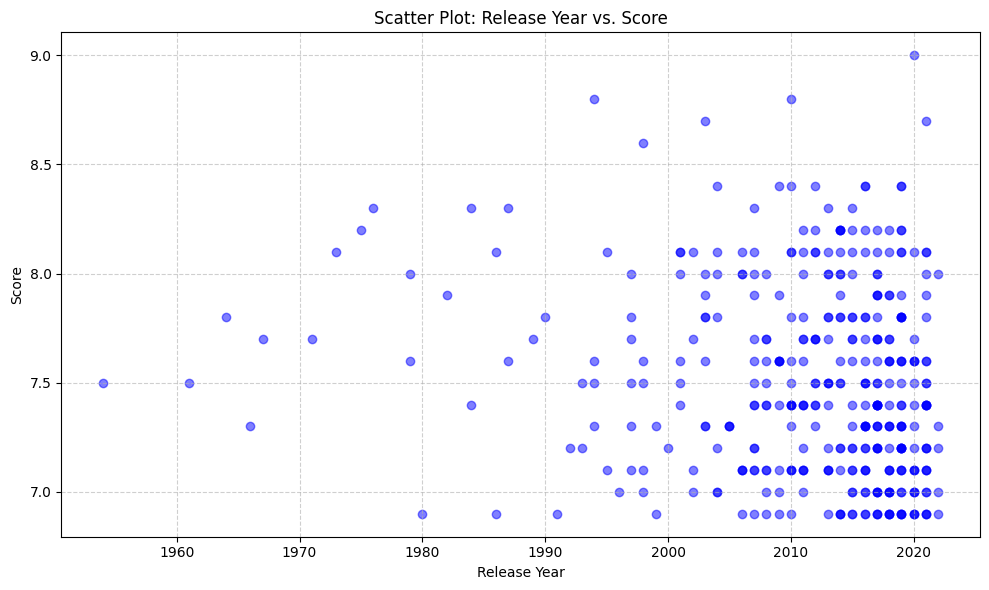

In [86]:
#Scatter plot to visualize the relationship between 'RELEASE_YEAR' and 'SCORE'
plt.figure(figsize=(10, 6))
plt.scatter(df['RELEASE_YEAR'], df['SCORE'], color='blue', marker='o', alpha=0.5)
plt.title('Scatter Plot: Release Year vs. Score')
plt.xlabel('Release Year')
plt.ylabel('Score')
# Customize the grid
plt.grid(True, linestyle='--', alpha=0.6)
# Adjust the subplot parameters for better positioning
plt.tight_layout()
plt.show()

## Time Series Analysis:

### Number Of Movies Released Each Year

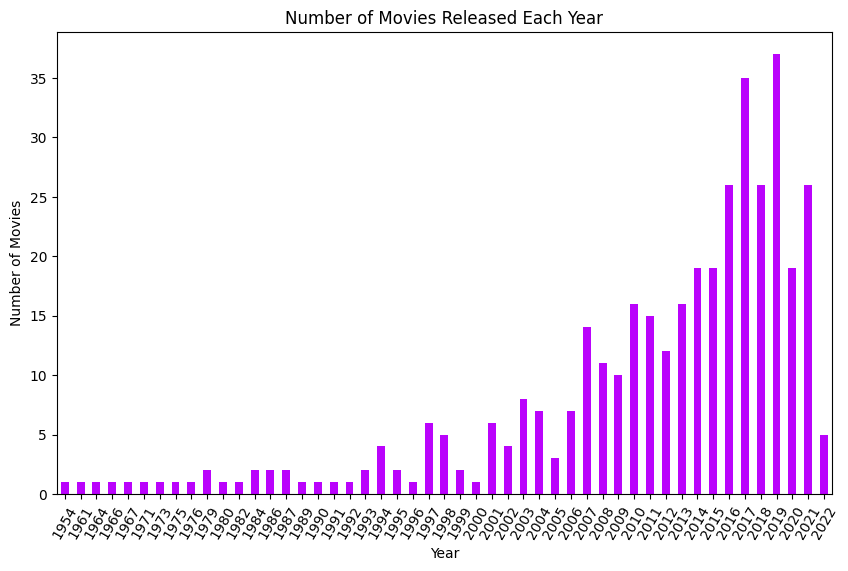

In [83]:
# Formating 'RELEASE_YEAR' column as a datetime or date-like data type
df['RELEASE_YEAR'] = pd.to_datetime(df['RELEASE_YEAR'], format='%Y')
# Grouping the data by a specific column allows us to aggregate and summarize information based on shared values in that column.
# In our case, grouping by 'RELEASE_YEAR' helps us organize movies released in the same year, making it easier to analyze trends and patterns over time.
movie_counts = df.groupby(df['RELEASE_YEAR'].dt.year)['index'].count()

# Create a time series plot for the number of movies released each year
plt.figure(figsize=(10, 6))
movie_counts.plot(kind='bar', color='#ba03fc')
plt.title('Number of Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
# Rotates x-axis labels by 60 degrees for better readability.
plt.xticks(rotation=60)
plt.show()

### Average Movie Score Over Time

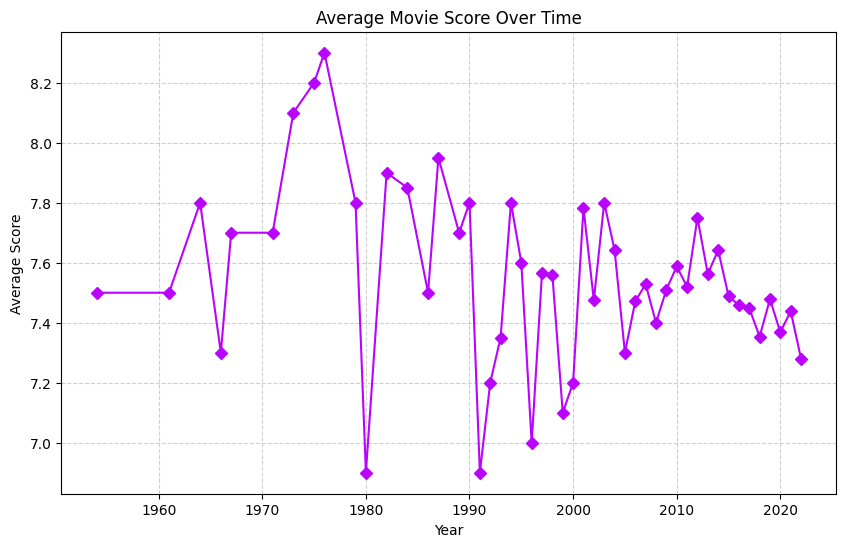

In [77]:
# Group the data by 'RELEASE_YEAR'
grouped_data = df.groupby(df['RELEASE_YEAR'].dt.year)
# Calculate the average score for each year
average_score = grouped_data['SCORE'].mean()

# Create a time series plot for the average score over time
plt.figure(figsize=(10, 6))
average_score.plot(linestyle='-', marker='D', color='#ba03fc')
plt.title('Average Movie Score Over Time')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Total Number of Votes Over Time

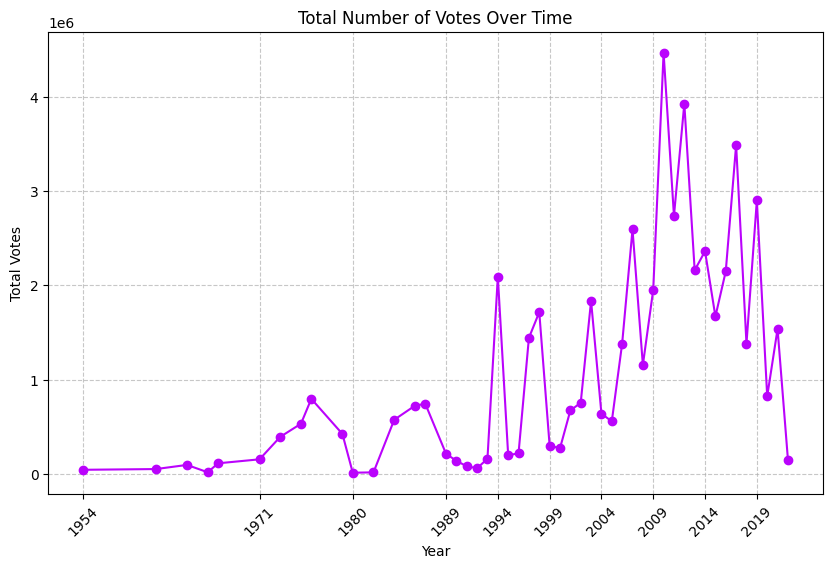

In [82]:
# Calculate the total number of votes for each year
total_votes = grouped_data['NUMBER_OF_VOTES'].sum()
# Create a time series plot for the total number of votes over time
plt.figure(figsize=(10, 6))
total_votes.plot(kind='line', marker='o', color='#ba03fc')
plt.title('Total Number of Votes Over Time')
plt.xlabel('Year')
plt.ylabel('Total Votes')
# Customize x-axis ticks to show every 5 years
plt.xticks(total_votes.index[::5], rotation=45)

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()